# Marie McCrary

## This notebook loads Kolyma River data and analyzes it using pandas

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import datetime
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

%matplotlib inline

# Kolyma River Temperatures


Read in data from two datasets: ArcticGRO (the Water Quality dataset) and GEMS. <br />
ArcticGRO -> df_a <br />
ArcticGRO temperatures -> Temp <br />
GEMS -> df_g <br />
GEMS station identifier for Kolyma = RUS00017

Some notes about this data:
1. The data were collected over several decades, and the data were not always consistently collected
2. The temperature data has large temporal gaps and few datapoints are in the ArcticGRO dataset

In [8]:
d1 = pd.read_csv('~/Research/Rivers/River_temperature/GEMS_Temperature_all_stations.csv', header=0, parse_dates=[1], index_col=[1]) 
df_g = pd.DataFrame(data=d1) 
df_g = df_g.rename(columns = {'Value': 'Temp'})
df_g = df_g.rename(columns = {'Sample Date': 'Date'})
df_g = df_g.loc[df_g.GEMS_Station_Number == 'RUS00017']
df_g = df_g[df_g['Temp'].notna()]

df_g

,GEMS_Station_Number,Sample Time,Depth,Parameter Code,Analysis Method Code,Value Flags,Temp,Unit,Data Quality,Remark,Integrated Value
Sample Date,,,,,,,,,,,
1980-05-27,RUS00017,7:40,0.5,TEMP,TEMP-Hg,NaN,0.1,°C,Fair,2061.0,NaN
1980-05-30,RUS00017,8:30,0.5,TEMP,TEMP-Hg,NaN,0.6,°C,Fair,2061.0,NaN
1980-06-08,RUS00017,7:10,0.5,TEMP,TEMP-Hg,NaN,5.3,°C,Fair,2061.0,NaN
1980-06-21,RUS00017,7:40,0.5,TEMP,TEMP-Hg,NaN,9.0,°C,Fair,2061.0,NaN
1980-07-14,RUS00017,5:15,0.5,TEMP,TEMP-Hg,NaN,14.5,°C,Fair,2061.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-07-04,RUS00017,11:00,0.5,TEMP,TEMP-Hg,NaN,5.6,°C,Fair,NaN,NaN
2019-07-25,RUS00017,18:40,0.5,TEMP,TEMP-Hg,NaN,18.4,°C,Fair,NaN,NaN
2019-07-31,RUS00017,18:50,0.5,TEMP,TEMP-Hg,NaN,12.6,°C,Fair,NaN,NaN


In [9]:
d2 = pd.read_csv('~/Research/Rivers/River_temperature/ArcticGRO_Water_Quality_Data_Kolyma.csv', header=8, parse_dates=[2], index_col=[2]) 
df_a = pd.DataFrame(data=d2) 
df_a=df_a.drop([df_a.index[0]])
df_a.index = pd.to_datetime(df_a.index)
df_a['Temp'] = df_a.Temp.astype(float, errors = 'raise')
df_a = df_a[df_a['Temp'].notna()]
df_a

,Phase,River,ID,Discharge,Temp,pH,Cond,Alk,A254,A375,...,POC (1),POC-13C (1),PON (1),PON-15N (1),Sample depth 2,TSS (2),POC (2),POC-13C (2),PON (2),PON-15N (2)
Date,,,,,,,,,,,,,,,,,,,,,
2003-08-26,PARTNERS,Kolyma,NaN,2340,11.1,7.7,NaN,30.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-06-11,PARTNERS,Kolyma,NaN,19300,10.9,6.7,NaN,16.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-06-15,PARTNERS,Kolyma,NaN,16300,11.8,7.4,NaN,18.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-06-25,PARTNERS,Kolyma,NaN,12600,12.3,7.2,NaN,14.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-07-15,PARTNERS,Kolyma,NaN,8040,7.1,7.1,NaN,15.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-05,Arctic-GRO IV,Kolyma,Kit 50,3010,4.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-21,Arctic-GRO IV,Kolyma,Kit 51,397,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25,Arctic-GRO IV,Kolyma,Kit 52,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
repeat = len(df_a.Temp)*['A']
df_agro = pd.DataFrame(df_a.Temp)
df_agro['source'] = repeat
df_agro

,Temp,source
Date,,
2003-08-26,11.1,A
2004-06-11,10.9,A
2004-06-15,11.8,A
2004-06-25,12.3,A
2004-07-15,7.1,A
...,...,...
2020-10-05,4.3,A
2020-12-21,0.0,A
2021-01-25,0.0,A


In [51]:
repeat = len(df_g.Temp)*['G']
df_gems = pd.DataFrame(df_g.Temp)
df_gems['source'] = repeat
df_gems

,Temp,source
Sample Date,,
1980-05-27,0.1,G
1980-05-30,0.6,G
1980-06-08,5.3,G
1980-06-21,9.0,G
1980-07-14,14.5,G
...,...,...
2019-07-04,5.6,G
2019-07-25,18.4,G
2019-07-31,12.6,G


Combine two datasets to clean up code. All temperature data are in temperature dataframe.

In [89]:
df = pd.concat([df_agro, df_gems], axis=0)
df = df.sort_index(axis = 0, ascending = True)
df.Temp

1980-05-27     0.1
1980-05-30     0.6
1980-06-08     5.3
1980-06-21     9.0
1980-07-14    14.5
              ... 
2020-10-05     4.3
2020-12-21     0.0
2021-01-25     0.0
2021-03-12     0.0
2021-06-02    11.6
Name: Temp, Length: 245, dtype: float64

In [42]:

series1 = pd.Series(df_a.Temp)
series2 = pd.Series(df_g.Temp)
temperature = series1.append(series2)

temperature.count()

245

In [43]:
temp_grouped = temperature.groupby(temperature.index.month)

df_a_grouped = df_a.Temp.groupby(df_a.index.month)
df_g_grouped = df_g.Temp.groupby(df_g.index.month, dropna=False)
df_g_grouped.get_group(3)                  

KeyError: 3

In [85]:
temp_grouped = df.groupby(df.index.month)
temp_grouped.get_group(12)

,Temp,source
2012-12-17,0.1,A
2014-12-22,0.0,A
2017-12-02,3.4,A
2020-12-21,0.0,A


In [71]:
df.loc[df['source'].str.endswith("A")].index

DatetimeIndex(['2003-08-26', '2004-06-11', '2004-06-15', '2004-06-25',
               '2004-07-15', '2004-08-10', '2004-08-25', '2004-09-23',
               '2005-04-22', '2005-06-30', '2005-07-19', '2005-08-14',
               '2005-08-27', '2005-09-12', '2005-09-29', '2006-07-24',
               '2006-11-20', '2009-06-05', '2009-06-12', '2009-06-21',
               '2009-09-09', '2009-11-08', '2010-05-30', '2010-06-07',
               '2010-06-13', '2010-09-20', '2010-11-17', '2011-06-10',
               '2011-06-17', '2011-06-24', '2011-09-05', '2011-11-05',
               '2012-06-24', '2012-08-22', '2012-10-07', '2012-12-17',
               '2013-03-08', '2013-05-03', '2013-07-27', '2013-09-20',
               '2013-11-13', '2014-02-28', '2014-04-26', '2014-06-08',
               '2014-08-26', '2014-10-11', '2014-12-22', '2015-01-23',
               '2015-03-25', '2015-05-13', '2015-07-23', '2015-09-20',
               '2016-02-06', '2016-04-25', '2016-06-21', '2016-08-19',
      

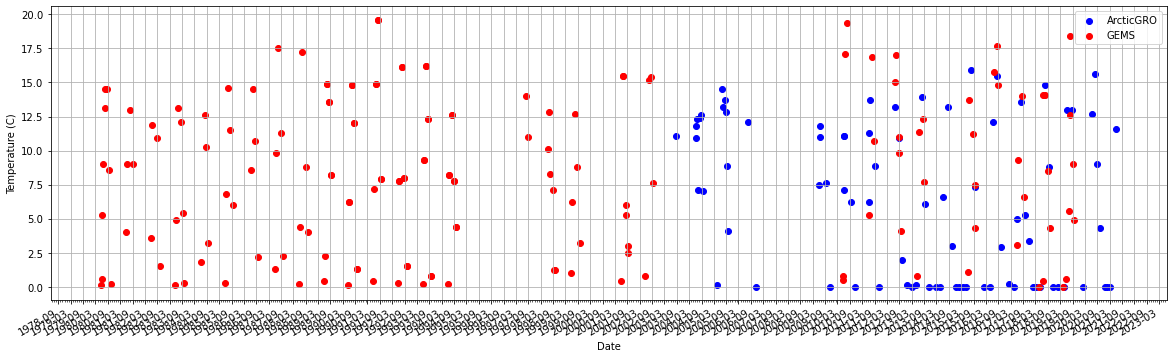

In [75]:
fig, ax = plt.subplots(figsize=(20,6))


ax.scatter(df.loc[df['source'].str.endswith("A")].index.values, df.loc[df['source'].str.endswith("A")].Temp, color = 'Blue', label = "ArcticGRO")
ax.scatter(df.loc[df['source'].str.endswith("G")].index.values, df.loc[df['source'].str.endswith("G")].Temp, color = 'Red', label = "GEMS")

ax.set(xlabel="Date",
       ylabel="Temperature (C)")

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

ax.legend()
plt.grid()
plt.show()


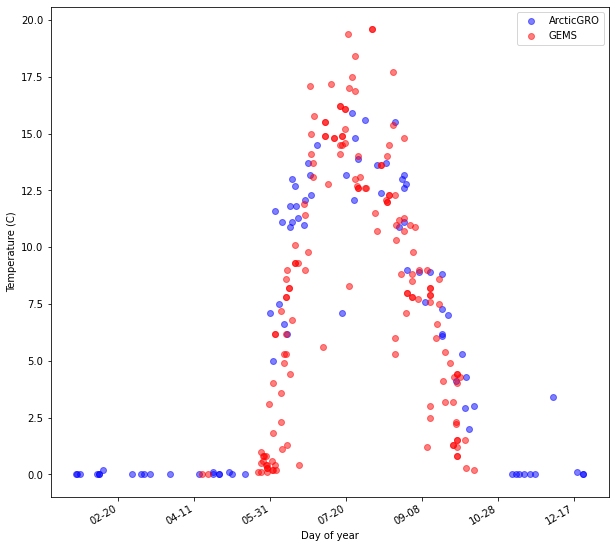

In [76]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df.loc[df['source'].str.endswith("A")].index.day_of_year, df.loc[df['source'].str.endswith("A")].Temp, color = 'Blue', label = 'ArcticGRO', alpha = 0.5)
ax.scatter(df.loc[df['source'].str.endswith("G")].index.day_of_year, df.loc[df['source'].str.endswith("G")].Temp, color = 'Red', label = 'GEMS', alpha = 0.5)


ax.set(xlabel="Day of year",
       ylabel="Temperature (C)")
ax.legend()


# # Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # Rotates and right aligns the x labels, and moves the bottom of the
# # axes up to make room for them.
fig.autofmt_xdate()

# ax.legend()
plt.show()
#April 1 to Nov 1, fit a curve through both


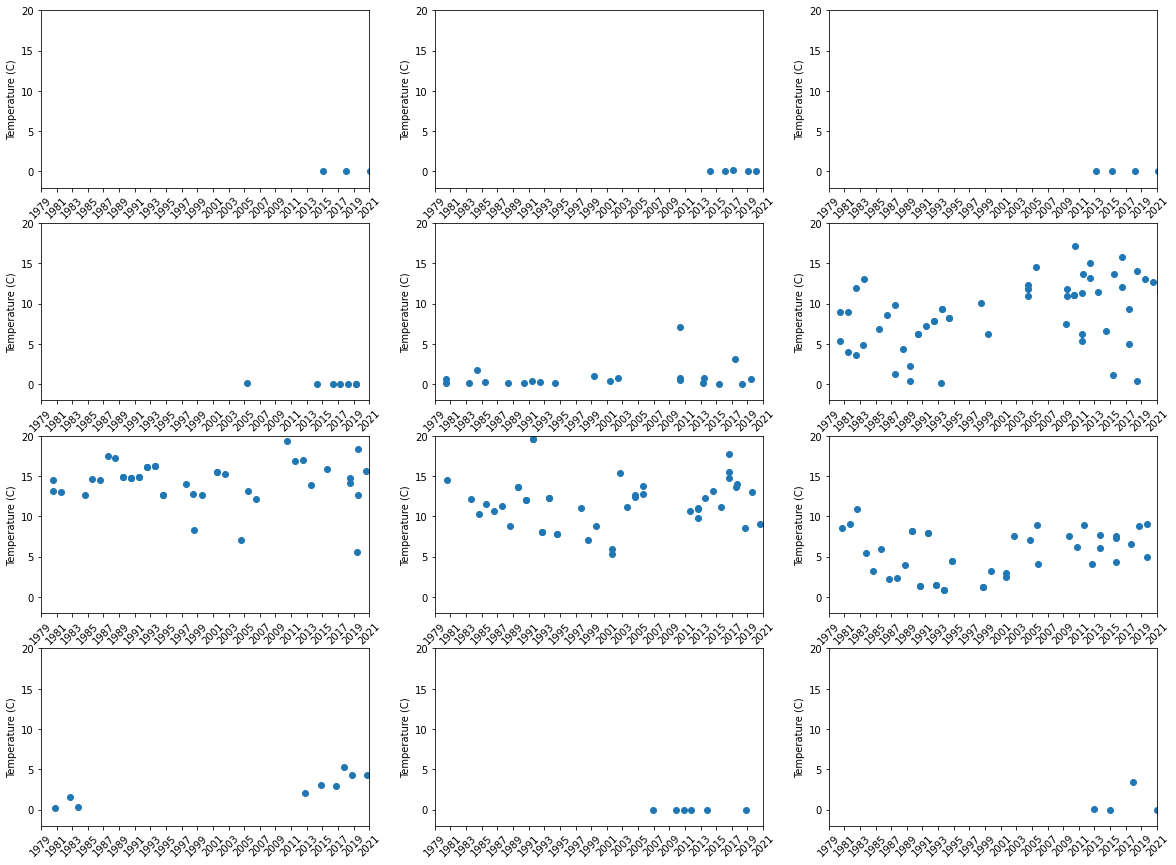

In [86]:

fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)

left = datetime.date(1979, 1, 1)
right = datetime.date(2021, 1, 1)


for i in range(1,13):
    axs = fig.add_subplot(4,3,i)
    axs.set_ylim([-2,20])
    axs.set_xlim([left, right])
    
    plt.scatter(temp_grouped.get_group(i).index, temp_grouped.get_group(i).Temp)



    #axs.legend()
   
    # Major ticks every year.
    fmt_year = mdates.MonthLocator(interval=24)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Temperature (C)")

#axs.legend()
plt.show()
# Group by day of year
# Why is there such a range of temperatures in September of 2010?
# Plot August and September temperatures by day
# Plot 2010 from May through September by day

## Monthly trends in temperature

Temperature Trend = 0.0
NRMSE: nan
Temperature Trend = 3.800588715305075e-18
NRMSE: 0.39999999999999997
Temperature Trend = 0.0
NRMSE: nan
Temperature Trend = -0.010714285714285727
NRMSE: 0.27664166758624403
Temperature Trend = 0.05448898927159797
NRMSE: 0.20849556268734903
Temperature Trend = 0.10202665755297341
NRMSE: 0.22609688770912822
Temperature Trend = -0.01860627177700344
NRMSE: 0.19168792452857536
Temperature Trend = 0.012766798418972403
NRMSE: 0.21614363086456712
Temperature Trend = 0.035699184536393834
NRMSE: 0.2801712876619576
Temperature Trend = 0.595
NRMSE: 0.1414050772881761
Temperature Trend = 0.0
NRMSE: nan
Temperature Trend = 0.31000000000000016
NRMSE: 0.4166464816333379


/var/folders/yr/09n9j8dx6nxd7bd93y88lgcr0000gn/T/ipykernel_58644/2348185329.py:11: RuntimeWarning: invalid value encountered in double_scalars
  nrmse = np.sqrt(mse)/(temp_grouped.Temp.get_group(i).max() - temp_grouped.Temp.get_group(i).min()) # or mean?


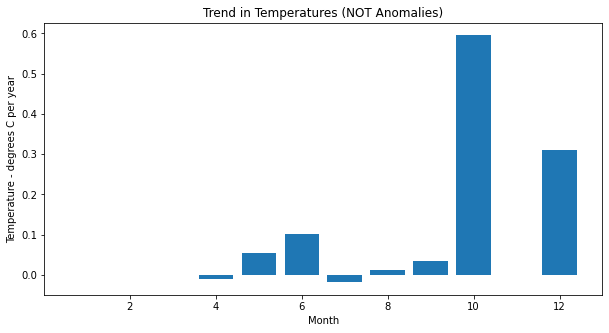

In [91]:
temp_trend = []
temp_nrmse = []
temp_trend_test = []
for i in range(1,13):
    #To perform the linear regression we need the dates to be numeric
    #date_ord = temp_grouped.get_group(i).index.values(datetime.date.toordinal)

    # perform regression
    coefficients, residuals, _, _, _ = np.polyfit(range(len(temp_grouped.get_group(i).index.values)),temp_grouped.Temp.get_group(i),1,full=True)
    mse = residuals[0]/(len(temp_grouped.Temp.get_group(i).index))
    nrmse = np.sqrt(mse)/(temp_grouped.Temp.get_group(i).max() - temp_grouped.Temp.get_group(i).min()) # or mean?
    temp_trend.append(coefficients[0])
    temp_nrmse.append(nrmse)
    print('Temperature Trend = ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))
    temp_trend_test.append(coefficients[1])
    
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(range(1,13), temp_trend)


plt.xlabel("Month")
plt.ylabel("Temperature - degrees C per year")
plt.title("Trend in Temperatures (NOT Anomalies)")

plt.show()

The above plot looks ridiculous because we only have a large gap in data for october and december.

### Mean temperature for each month:
monthly_mean_temperature is the mean for each month in the series (237 months). <br />
monthly_mean is the mean of all the monthly means for each month.

In [92]:
monthly_mean_temperature = df.Temp.resample('M').mean().dropna()
monthly_mean = monthly_mean_temperature.groupby(monthly_mean_temperature.index.month).agg('mean')
monthly_min_temperature = df.Temp.resample('M').min().dropna()
monthly_min = monthly_min_temperature.groupby(monthly_min_temperature.index.month).agg('min')
monthly_max_temperature = df.Temp.resample('M').max().dropna()
monthly_max = monthly_max_temperature.groupby(monthly_max_temperature.index.month).agg('max')

In [93]:
monthly_mean_temperature

1980-05-31     0.35
1980-06-30     7.15
1980-07-31    13.80
1980-08-31    14.50
1980-09-30     8.60
              ...  
2020-10-31     4.30
2020-12-31     0.00
2021-01-31     0.00
2021-03-31     0.00
2021-06-30    11.60
Name: Temp, Length: 176, dtype: float64

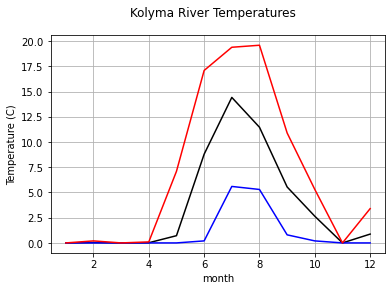

In [94]:
fig, ax = plt.subplots()
fig.suptitle('Kolyma River Temperatures')

ax.plot(monthly_mean, label = 'Mean', color = 'black')
ax.plot(monthly_min, label = 'Min', color = 'blue')
ax.plot(monthly_max, label = 'Max', color = 'red')
#ax.fill_between(range(1,13), monthly_min_temperature, monthly_max_temperature, color = 'gray', alpha = 0.25)
ax.set(ylabel = "Temperature (C)", xlabel = 'month')
plt.grid()

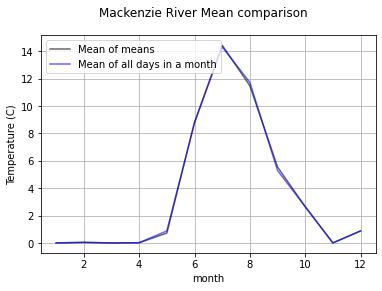

In [96]:
monthly_mean_old = df.Temp.groupby(df.index.month).agg('mean')

fig, ax = plt.subplots()
fig.suptitle('Mackenzie River Mean comparison')

ax.plot(monthly_mean, label = 'Mean of means', color = 'black', alpha = 0.6)
ax.plot(monthly_mean_old, label = 'Mean of all days in a month', color = 'blue', alpha = 0.6)
ax.set(ylabel = "Temperature (C)", xlabel = 'month')
ax.legend()
plt.grid()
# They are very close. Plot difference

## River Temperature Anomalies

In [97]:
anomaly = []

for i in range(1,13):
    diff = monthly_mean_temperature.groupby(monthly_mean_temperature.index.month).get_group(i) - monthly_mean[i]
    anomaly.append(diff)

In [98]:
anomaly[8]

1980-09-30    3.054444
1981-09-30    3.454444
1982-09-30    5.354444
1983-09-30   -0.145556
1984-09-30   -2.345556
1985-09-30    0.454444
1986-09-30   -3.345556
1987-09-30   -3.245556
1988-09-30   -1.545556
1989-09-30    2.654444
1990-09-30   -4.245556
1991-09-30    2.354444
1992-09-30   -4.045556
1993-09-30   -4.745556
1994-09-30   -1.145556
1998-09-30   -4.345556
1999-09-30   -2.345556
2001-09-30   -2.795556
2002-09-30    2.054444
2004-09-30    1.454444
2005-09-30    0.954444
2009-09-30    2.054444
2010-09-30    0.654444
2011-09-30    3.354444
2012-09-30   -1.445556
2013-09-30    1.354444
2015-09-30    0.821111
2017-09-30    1.054444
2018-09-30    3.254444
2019-09-30    1.404444
Name: Temp, dtype: float64

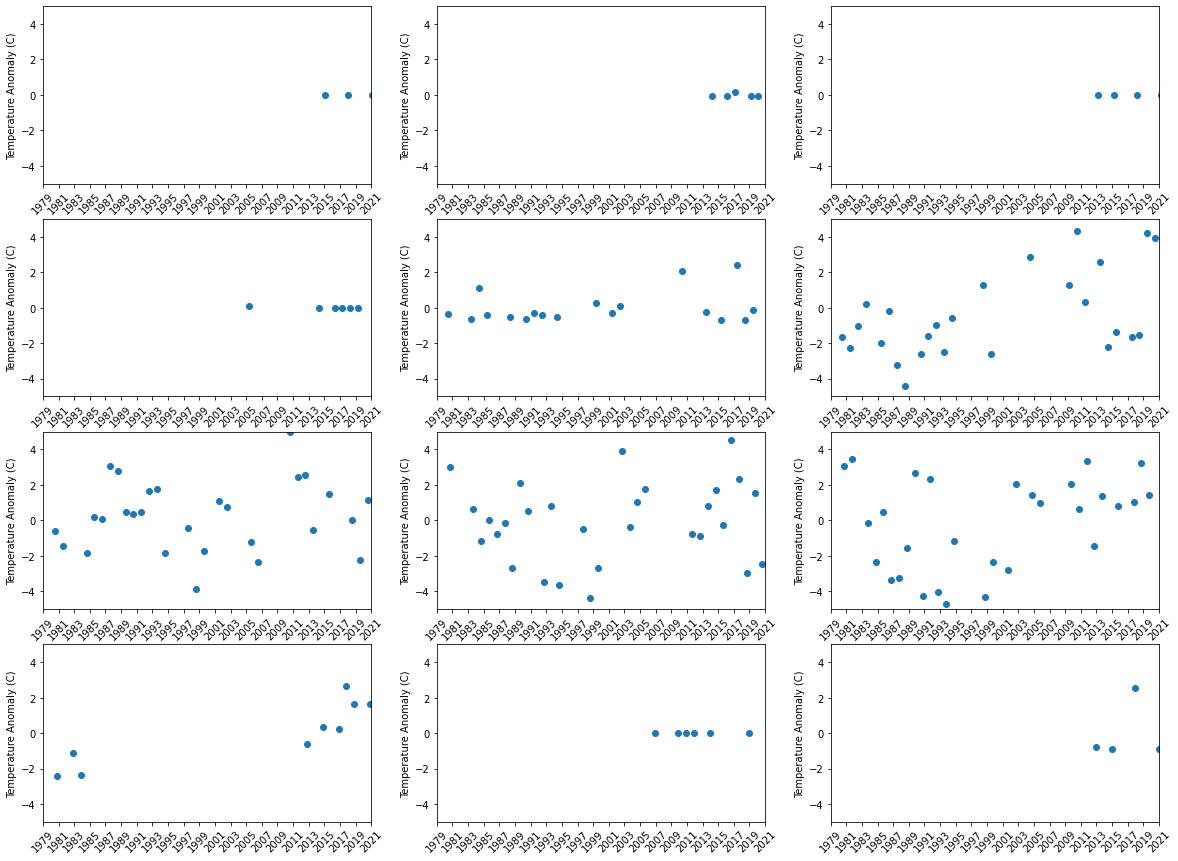

In [100]:

fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)

left = datetime.date(1979, 1, 1)
right = datetime.date(2021, 1, 1)


for i in range(0,12):
    axs = fig.add_subplot(4,3,i+1)
    axs.set_ylim([-5, 5])
    axs.set_xlim([left, right])
    plt.scatter(anomaly[i].index, anomaly[i])
   
    # Major ticks every year.
    fmt_year = mdates.MonthLocator(interval=24)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Temperature Anomaly (C)")

plt.show()

Temperature Trend = 5.374844106186571e-18
Temperature Trend = 0.0
Temperature Trend = -0.014285714285714282
Temperature Trend = 0.041898864809081546
Temperature Trend = 0.18816196236559146
Temperature Trend = 0.005270935960591109
Temperature Trend = 0.0006720430107526465
Temperature Trend = 0.036269929551353344
Temperature Trend = 0.5950000000000001
Temperature Trend = 0.0
Temperature Trend = 0.31000000000000005


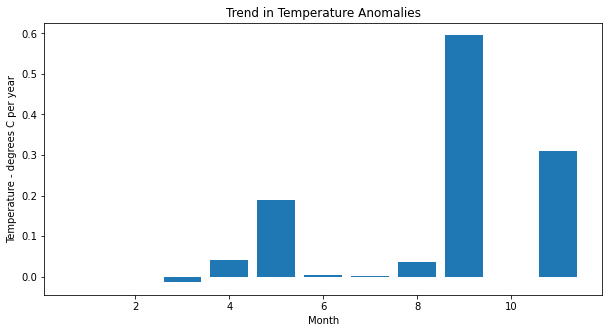

In [101]:
temp_trend_a = []
temp_nrmse_a = []
for i in range(1,12):
    #To perform the linear regression we need the dates to be numeric
    #date_ord = anomaly.index(datetime.date.toordinal)

    # perform regression
    coefficients, residuals, _, _, _ = np.polyfit(range(len(anomaly[i].index)),anomaly[i],1,full=True)
    #mse = residuals[0]/(len(anomaly[i].index))
    #nrmse = np.sqrt(mse)/(anomaly[i].max() - anomaly[i].min())
    temp_trend_a.append(coefficients[0])
    temp_nrmse_a.append(nrmse)
    print('Temperature Trend = ' + str(coefficients[0]))
    #print('NRMSE: ' + str(nrmse))
    
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(range(1,12), temp_trend_a)


plt.xlabel("Month")
plt.ylabel("Temperature - degrees C per year")
plt.title("Trend in Temperature Anomalies")

plt.show()

# Discharge

In [102]:
df_d = pd.read_csv('~/Research/Rivers/River_Discharge/ArcticGRO_discharge_data_Kolyma.csv', parse_dates= [4], index_col = [4]) 
df_d = df_d[df_d['discharge'].notna()]
df_d

,river,agency,station_code,station_name,discharge,flag
date,,,,,,
1927-06-03,Kolyma,Roshydromet,1801.0,Srednekolymsk,10300.0,A
1927-06-04,Kolyma,Roshydromet,1801.0,Srednekolymsk,10400.0,A
1927-06-05,Kolyma,Roshydromet,1801.0,Srednekolymsk,10600.0,A
1927-06-06,Kolyma,Roshydromet,1801.0,Srednekolymsk,11100.0,A
1927-06-07,Kolyma,Roshydromet,1801.0,Srednekolymsk,11400.0,A
...,...,...,...,...,...,...
2018-12-27,Kolyma,Roshydromet,1801.0,Srednekolymsk,491.0,A
2018-12-28,Kolyma,Roshydromet,1801.0,Srednekolymsk,487.0,A
2018-12-29,Kolyma,Roshydromet,1801.0,Srednekolymsk,487.0,A


In [103]:
discharge_grouped = df_d['discharge'].groupby(df_d.index.month)
discharge_grouped.agg("count")

date
1     2181
2     2010
3     2254
4     2164
5     1937
6     2419
7     2573
8     2573
9     2490
10    1754
11    1663
12    2078
Name: discharge, dtype: int64

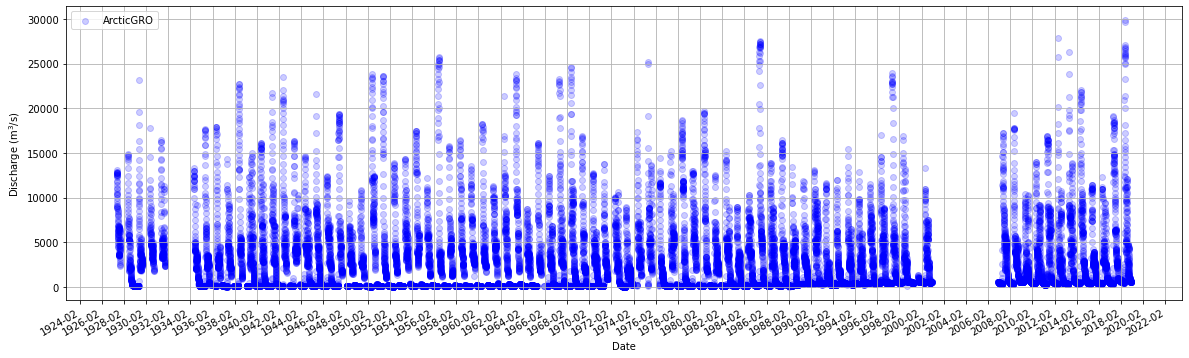

In [106]:
fig, ax = plt.subplots(figsize=(20,6))

ax.scatter(df_d.index.values, df_d.discharge, color = 'Blue', label = 'ArcticGRO', alpha = 0.2)


ax.set(xlabel="Date",
       ylabel="Discharge (m$^3$/s)")

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=24)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
# fmt_month = mdates.MonthLocator()
# ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

ax.legend()
plt.grid()
plt.show()



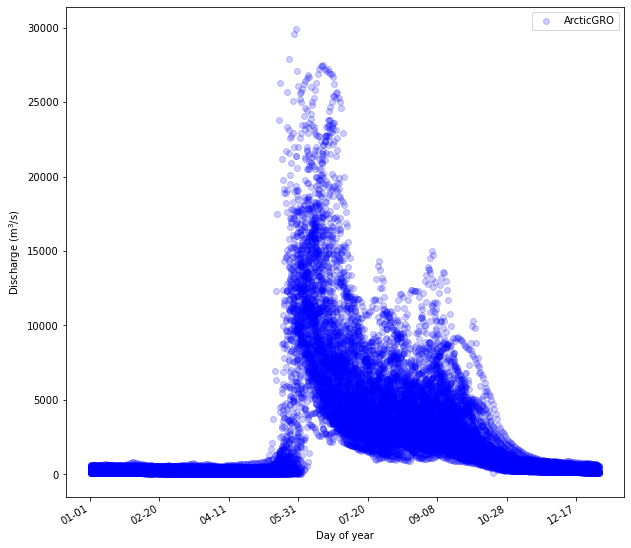

In [107]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df_d.index.day_of_year, df_d['discharge'], color = 'Blue', label = 'ArcticGRO', alpha = 0.2)


ax.set(xlabel="Day of year",
       ylabel="Discharge (m$^3$/s)")
ax.legend()


# # Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # Rotates and right aligns the x labels, and moves the bottom of the
# # axes up to make room for them.
fig.autofmt_xdate()

# ax.legend()
plt.show()

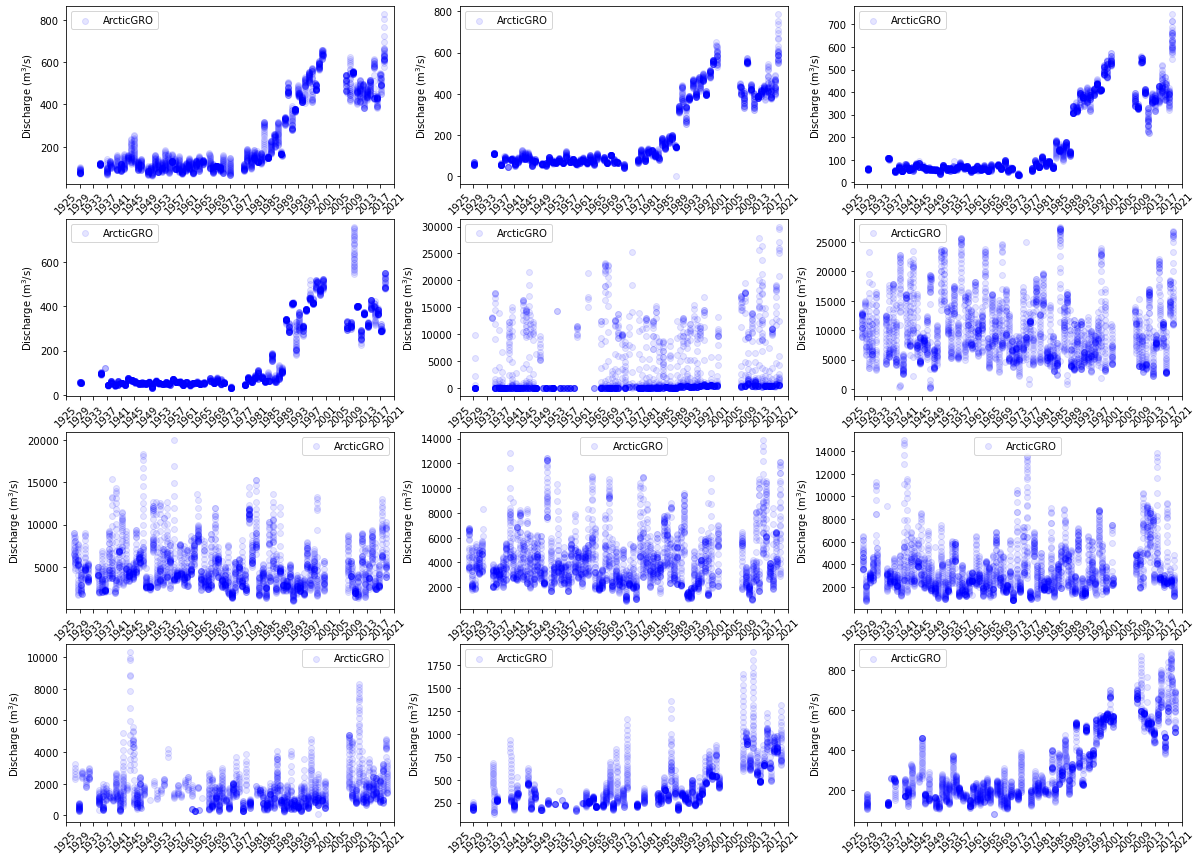

In [115]:
fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)

left = datetime.date(1925, 1, 1)
right = datetime.date(2021, 1, 1)


for i in range(1,13):
    axs = fig.add_subplot(4,3,i)
    #axs.set_ylim([0, 30000])
    axs.set_xlim([left, right])
    plt.scatter(discharge_grouped.get_group(i).index, discharge_grouped.get_group(i), color = 'Blue', label = 'ArcticGRO', alpha = 0.1)
    axs.legend()
   
    # Major ticks every other year.
    fmt_year = mdates.MonthLocator(interval=48)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Discharge (m$^3$/s)")

axs.legend()
plt.show()

#Note the winter increase and the y axes are not the same scale

Discharge Trend = 0.23894469381693859
NRMSE: 0.12548838770129148
Discharge Trend = 0.24979571399818637
NRMSE: 0.11995805871525497
Discharge Trend = 0.21149562546400485
NRMSE: 0.13096594309189513
Discharge Trend = 0.2085070329468749
NRMSE: 0.1346758894666621
Discharge Trend = 1.250017770581072
NRMSE: 0.17720470617989212
Discharge Trend = -0.6261161499278873
NRMSE: 0.19132764033465904
Discharge Trend = -0.40815901833503226
NRMSE: 0.1360719303811252
Discharge Trend = 0.15053643117536394
NRMSE: 0.16073711046285677
Discharge Trend = 0.381504229653608
NRMSE: 0.144457459372025
Discharge Trend = 0.27436090182383943
NRMSE: 0.115019058175803
Discharge Trend = 0.35220877262245726
NRMSE: 0.11480230609651888
Discharge Trend = 0.2448986943816655
NRMSE: 0.13245992756418565


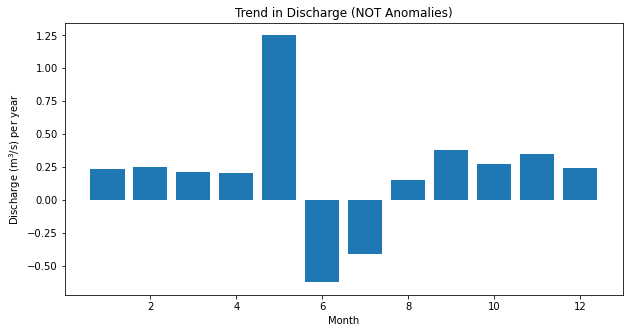

In [116]:
dis_trend = []
dis_nrmse = []

for i in range(1,13):
    #To perform the linear regression we need the dates to be numeric
    #date_ord = temp_grouped.get_group(i).index.values(datetime.date.toordinal)

    # perform regression
    coefficients, residuals, _, _, _ = np.polyfit(range(len(discharge_grouped.get_group(i).index.values)),discharge_grouped.get_group(i),1,full=True)
    mse = residuals[0]/(len(discharge_grouped.get_group(i).index))
    nrmse = np.sqrt(mse)/(discharge_grouped.get_group(i).max() - discharge_grouped.get_group(i).min())
    dis_trend.append(coefficients[0])
    dis_nrmse.append(nrmse)
    print('Discharge Trend = ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))
    
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(range(1,13), dis_trend)


plt.xlabel("Month")
plt.ylabel("Discharge (m$^3$/s) per year")
plt.title("Trend in Discharge (NOT Anomalies)")

plt.show()

### Mean discharge for each month:
monthly_mean_discharge is the mean for each month in the series (lots of months). <br />
monthly_mean_d is the mean of all the monthly means for each month.

In [117]:
monthly_mean_discharge = df_d.discharge.resample('M').mean().dropna()
monthly_mean_d = df_d.discharge.groupby(df_d.discharge.index.month).agg('mean')

monthly_min_discharge = df_d.discharge.resample('M').min().dropna()
monthly_min_d = df_d.discharge.groupby(df_d.discharge.index.month).agg('min')

monthly_max_discharge = df_d.discharge.resample('M').max().dropna()
monthly_max_d = df_d.discharge.groupby(df_d.discharge.index.month).agg('max')

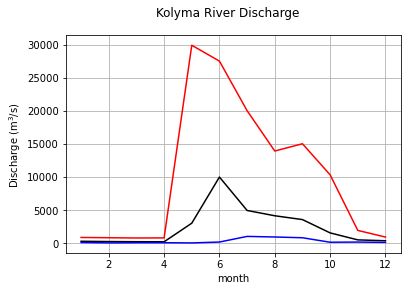

In [118]:
fig, ax = plt.subplots()
fig.suptitle('Kolyma River Discharge')

ax.plot(monthly_mean_d, label = 'Mean', color = 'black')
ax.plot(monthly_min_d, label = 'Min', color = 'blue')
ax.plot(monthly_max_d, label = 'Max', color = 'red')

ax.set(ylabel = "Discharge (m$^3$/s)", xlabel = 'month')
plt.grid()

## Discharge Anomalies

In [119]:
anomaly_dis = [] # The anomaly for every month in the entire series

for i in range(1,13):
    diff = monthly_mean_discharge.groupby(monthly_mean_discharge.index.month).get_group(i) - monthly_mean_d[i]
    anomaly_dis.append(diff)

Discharge Trend = 7.307580054354246
NRMSE: 0.16353286081368615
Discharge Trend = 6.969987053481334
NRMSE: 0.16160752407300025
Discharge Trend = 6.523931421076802
NRMSE: 0.15485053606525578
Discharge Trend = 5.963570426105509
NRMSE: 0.15892094838281
Discharge Trend = 9.778987036670078
NRMSE: 0.20279136449272403
Discharge Trend = -20.607870008229714
NRMSE: 0.22615428780426186
Discharge Trend = -12.319227680645024
NRMSE: 0.20004683706462298
Discharge Trend = 4.748199948270093
NRMSE: 0.18405402802843898
Discharge Trend = 11.741204539412
NRMSE: 0.2161556360522459
Discharge Trend = -1.473430967359324
NRMSE: 0.1547913758863201
Discharge Trend = 9.447586255984078
NRMSE: 0.16620809068738213
Discharge Trend = 6.656556893368534
NRMSE: 0.14831756376934196


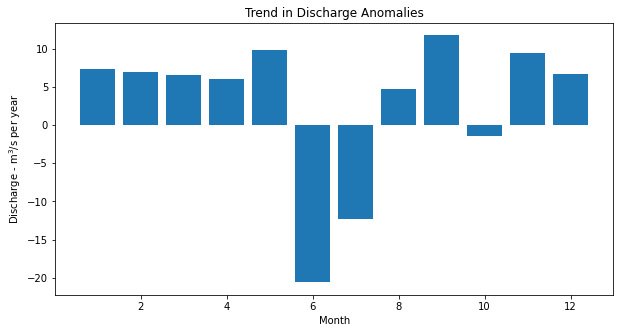

In [120]:
dis_trend_a = [] # The anomaly trend binned for each month (1 - 12) for the entire series
dis_nrmse_a = [] # The anomaly normed RMS error binned for each month (1 - 12_ for the entire series

for i in range(0,12):
    
    coefficients, residuals, _, _, _ = np.polyfit(range(len(anomaly_dis[i].index)),anomaly_dis[i],1,full=True)
    mse = residuals[0]/(len(anomaly_dis[i].index))
    nrmse = np.sqrt(mse)/(anomaly_dis[i].max() - anomaly_dis[i].min())
    dis_trend_a.append(coefficients[0])
    dis_nrmse_a.append(nrmse)
    print('Discharge Trend = ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))
    
fig = plt.figure(figsize = (10, 5))
plt.bar(range(1,13), dis_trend_a)


plt.xlabel("Month")
plt.ylabel("Discharge - m$^3$/s per year")
plt.title("Trend in Discharge Anomalies")

plt.show()

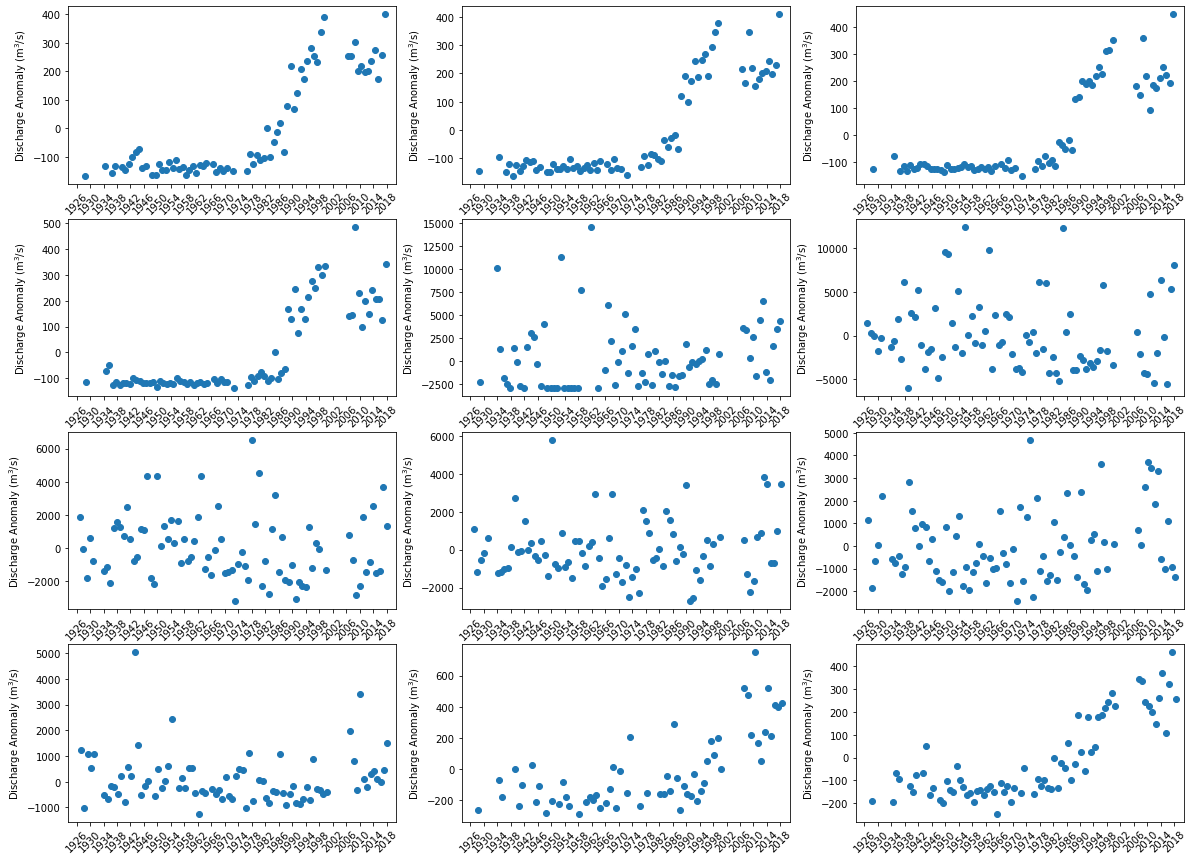

In [121]:
fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)

left = datetime.date(1924, 1, 1)
right = datetime.date(2021, 6, 1)


for i in range(0,12):
    axs = fig.add_subplot(4,3,i+1)
    #axs.set_ylim([-8000, 8000])
    axs.set_xlim([left, right])
    plt.scatter(anomaly_dis[i].index, anomaly_dis[i])
   
    # Major ticks every other year.
    fmt_year = mdates.MonthLocator(interval=48)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Discharge Anomaly (m$^3$/s)")

plt.show()

In [122]:
dis_trend_a # The anomaly trend binned for each month (1 - 12) for the entire series

[7.307580054354246,
 6.969987053481334,
 6.523931421076802,
 5.963570426105509,
 9.778987036670078,
 -20.607870008229714,
 -12.319227680645024,
 4.748199948270093,
 11.741204539412,
 -1.473430967359324,
 9.447586255984078,
 6.656556893368534]

In [123]:
dis_trend # The trend binned for each month (1 - 12) for the entire series

[0.23894469381693859,
 0.24979571399818637,
 0.21149562546400485,
 0.2085070329468749,
 1.250017770581072,
 -0.6261161499278873,
 -0.40815901833503226,
 0.15053643117536394,
 0.381504229653608,
 0.27436090182383943,
 0.35220877262245726,
 0.2448986943816655]

Why are they different?

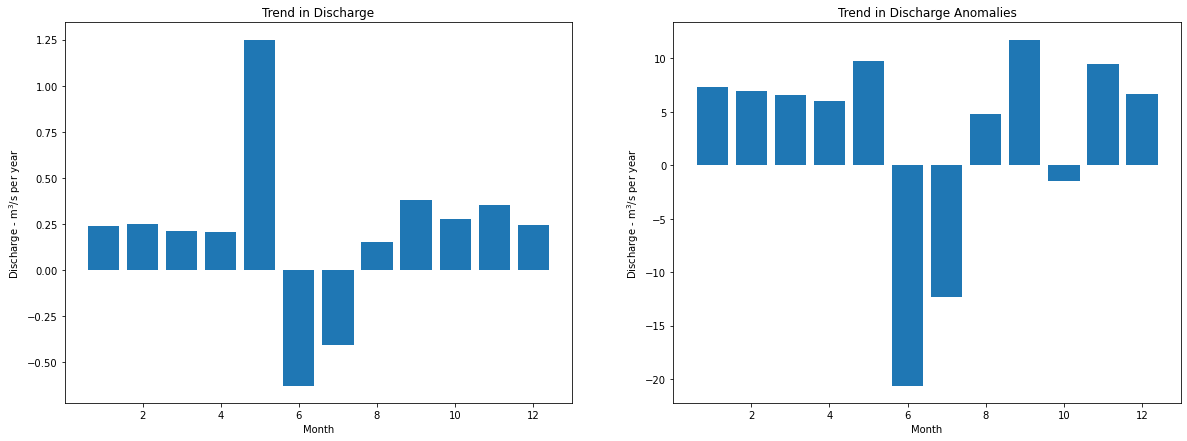

In [124]:
fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(7)
fig.set_figwidth(20)

axs = fig.add_subplot(1,2,1)
plt.bar(range(1,13), dis_trend)
plt.xlabel("Month")
plt.ylabel("Discharge - m$^3$/s per year")
plt.title("Trend in Discharge")

axs = fig.add_subplot(1,2,2)
plt.bar(range(1,13), dis_trend_a)
plt.xlabel("Month")
plt.ylabel("Discharge - m$^3$/s per year")
plt.title("Trend in Discharge Anomalies")

plt.show()

# Heat Flux

%%latex

The monthly means of Temperature (C) and Q (m$^3$/s) are used to calculate heat flux (HF) based on the following formula: <br />

\begin{equation}
HF = 86400 Cp∙\rho∙Q∙WT∙N/10$^12$
\end{equation}

Where HF is the total heat flux per month (106 MJ) relative to water freezing point; Q is the monthly mean discharge (m$^3$/s); WT is the monthly mean water temperature (◦C); N refers to number of days in a given month; Cp is the specific heat of river water (4.184 J/(◦C g)); $\rho$ is
water density (10$^6$ g/m$^3$); and the constant 86400 refers to number of seconds in a day.

Water density varies with temperature and its variation is very small for water temperature range from 0 to 20 ◦C. The density used above (i.e. 106g/m3) is the maximum at 4 ◦C. Heat transport by ice, sediment and other debris in the river water is difficult to quantify and
not considered in this analysis.

In [125]:
Cp = 4.184
rho = 10**6
s = 86400


In [126]:
# To get N (Number of days in month):
def is_leap_year(year):
    return (year % 4 == 0) and (year % 100 != 0) or (year % 400 == 0)

def days_in_month(month, year):

    if month in [9, 4, 6, 11]:
        return 30

    elif month in [1, 3, 5, 7, 8, 10, 12]:
        return 31        

    elif month == 2 and is_leap_year(year) == True:
        return 29

    elif month == 2 and is_leap_year(year) == False:
        return 28

    else:
        return None

Calculate heat flux from 2000 to present

monthly_mean_discharge is the mean for each month in the series (lots of months). <br />
monthly_mean_temperature is the mean for each month in the series (237 months). <br />

In [127]:
monthly_mean_discharge

date
1927-06-30    11382.142857
1927-07-31     6750.967742
1927-08-31     5183.548387
1927-09-30     4685.666667
1927-10-31     2730.000000
                  ...     
2018-08-31     7542.903226
2018-09-30     2164.000000
2018-10-31     3011.935484
2018-11-30      881.366667
2018-12-31      582.290323
Name: discharge, Length: 912, dtype: float64

In [128]:
monthly_mean_temperature

1980-05-31     0.35
1980-06-30     7.15
1980-07-31    13.80
1980-08-31    14.50
1980-09-30     8.60
              ...  
2020-10-31     4.30
2020-12-31     0.00
2021-01-31     0.00
2021-03-31     0.00
2021-06-30    11.60
Name: Temp, Length: 176, dtype: float64

We need to scale mean discharge and mean temoerature so the length of each series matches. Then, for each time step, grab the month and year and put it in to the days_in_month function above to get N. Then we can proceed with the heat flux formula.

In [129]:
monthly_mean_temperature = pd.DataFrame(monthly_mean_temperature)

In [130]:
monthly_mean_discharge = pd.DataFrame(monthly_mean_discharge)

In [131]:
result = pd.concat([monthly_mean_temperature.Temp, monthly_mean_discharge.discharge], axis = 1, join = 'inner')

In [132]:
HF = []
for i in range(0, len(result.index)):
    N = days_in_month(result.index.month[i], result.index.year[i])
    heat = 86400 * Cp * rho * result.Temp[i] * result.discharge[i] * N/(10**12)
    HF.append(heat)
    

In [133]:
result['HF'] = HF

In [134]:
result

,Temp,discharge,HF
1980-05-31,0.35,382.990323,1.502183e+03
1980-06-30,7.15,15952.000000,1.236938e+06
1980-07-31,13.80,9447.096774,1.460981e+06
1980-08-31,14.50,3552.580645,5.772701e+05
1980-09-30,8.60,1991.333333,1.857245e+05
...,...,...,...
2018-07-31,14.45,6247.419355,1.011662e+06
2018-08-31,8.50,7542.903226,7.184964e+05
2018-09-30,8.80,2164.000000,2.065221e+05
2018-10-31,4.30,3011.935484,1.451380e+05


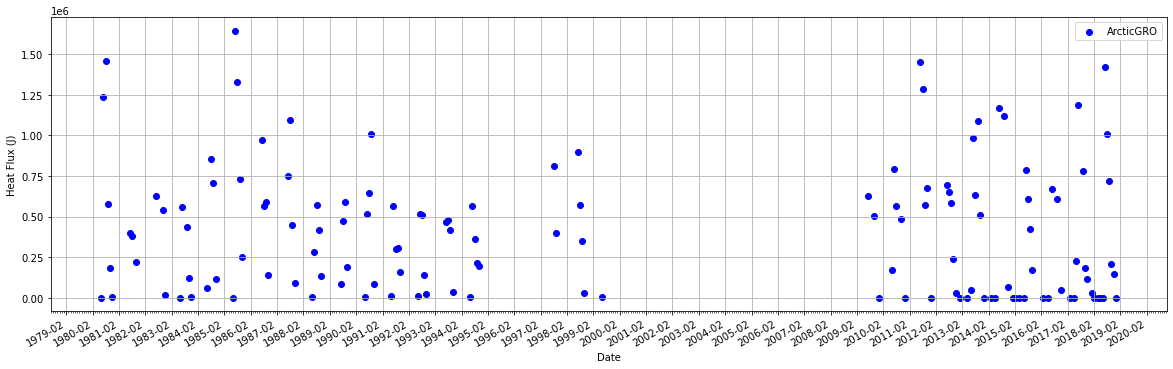

In [136]:
fig, ax = plt.subplots(figsize=(20,6))

ax.scatter(result.index.values, result.HF, color = 'Blue', label = 'ArcticGRO')


ax.set(xlabel="Date",
       ylabel="Heat Flux (J)")

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=12)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

ax.legend()
plt.grid()
plt.show()

In [137]:
result_grouped = result.groupby(result.index.month)
result_grouped.agg("count")

,Temp,discharge,HF
1,2,2,2
2,3,3,3
3,3,3,3
4,4,4,4
5,15,15,15
6,25,25,25
7,21,21,21
8,23,23,23
9,24,24,24
10,8,8,8


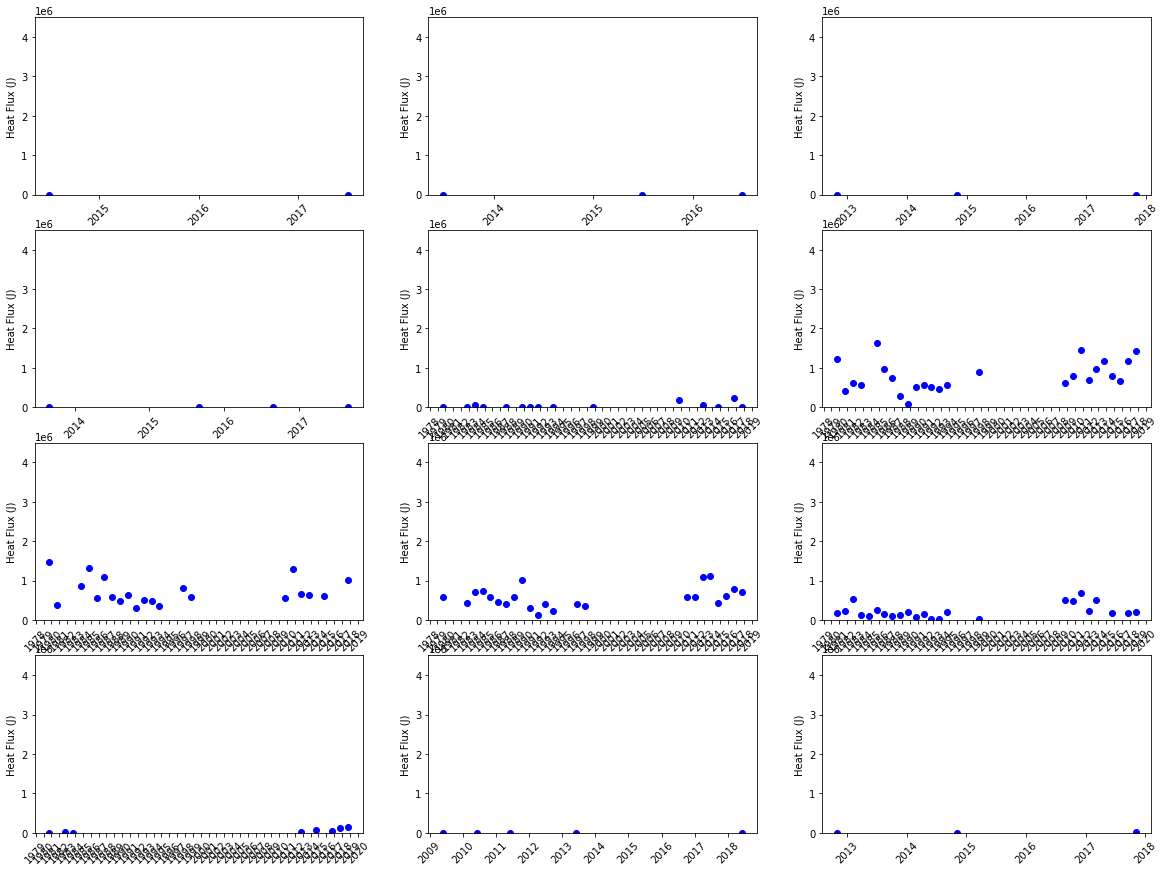

In [139]:
fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)


for i in range(1,13):
    axs = fig.add_subplot(4,3,i)
    axs.set_ylim([0, 4.5*10**6])
    plt.scatter(result_grouped.get_group(i).index, result_grouped.HF.get_group(i), color = 'Blue')
    
   
    # Major ticks every year.
    fmt_year = mdates.MonthLocator(interval=12)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Heat Flux (J)")


plt.show()



Heat flux monthly trends:

zsh:1: no matches found: residuals[0]/(len(result_grouped.get_group(i).index))
Heat Flux Trend = 0.0
NRMSE: inf
zsh:1: no matches found: residuals[0]/(len(result_grouped.get_group(i).index))
Heat Flux Trend = 443.1599078400002
NRMSE: 192.00233104787216
zsh:1: no matches found: residuals[0]/(len(result_grouped.get_group(i).index))


/var/folders/yr/09n9j8dx6nxd7bd93y88lgcr0000gn/T/ipykernel_58644/644784197.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  nrmse = np.sqrt(mse)/(result_grouped.HF.get_group(i).max() - result_grouped.HF.get_group(i).min())


Heat Flux Trend = 0.0
NRMSE: inf
zsh:1: no matches found: residuals[0]/(len(result_grouped.get_group(i).index))
Heat Flux Trend = 0.0
NRMSE: inf
zsh:1: no matches found: residuals[0]/(len(result_grouped.get_group(i).index))
Heat Flux Trend = 6174.998421226971
NRMSE: 0.7575188711595114
zsh:1: no matches found: residuals[0]/(len(result_grouped.get_group(i).index))
Heat Flux Trend = 14645.668607007521
NRMSE: 0.10932951877453112
zsh:1: no matches found: residuals[0]/(len(result_grouped.get_group(i).index))
Heat Flux Trend = -8627.310456506184
NRMSE: 0.1466860741267468
zsh:1: no matches found: residuals[0]/(len(result_grouped.get_group(i).index))
Heat Flux Trend = 8234.926401543089
NRMSE: 0.17345474281354886
zsh:1: no matches found: residuals[0]/(len(result_grouped.get_group(i).index))
Heat Flux Trend = 5824.577165133911
NRMSE: 0.26238256372446367
zsh:1: no matches found: residuals[0]/(len(result_grouped.get_group(i).index))
Heat Flux Trend = 20010.262742765713
NRMSE: 1.1908559599882949
zsh

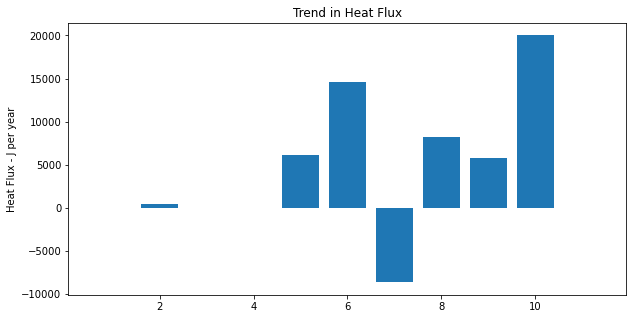

In [145]:
HF_trend = [] # The  trend binned for each month (1 - 12) for the entire series
HF_nrmse = [] # The  normed RMS error binned for each month (1 - 12_ for the entire series

for i in [x for x in range(1,12)]:
    
    coefficients, residuals, _, _, _ = np.polyfit(range(len(result_grouped.get_group(i).index)),result_grouped.HF.get_group(i),1,full=True)
    !mse = residuals[0]/(len(result_grouped.get_group(i).index))
    nrmse = np.sqrt(mse)/(result_grouped.HF.get_group(i).max() - result_grouped.HF.get_group(i).min())
    HF_trend.append(coefficients[0])
    #HF_nrmse.append(nrmse)
    print('Heat Flux Trend = ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))
    
fig = plt.figure(figsize = (10, 5))
plt.bar(range(1,12), HF_trend)


#plt.xlabel("Month")
plt.ylabel("Heat Flux - J per year")
plt.title("Trend in Heat Flux")

plt.show()

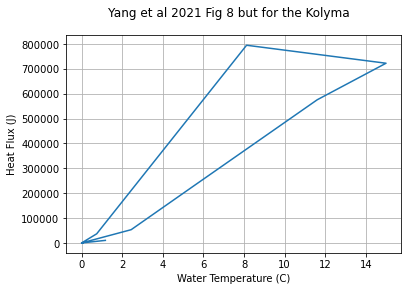

In [147]:
fig, ax = plt.subplots()
fig.suptitle('Yang et al 2021 Fig 8 but for the Kolyma')

ax.plot(result_grouped.Temp.agg("mean"), result_grouped.HF.agg("mean"))
ax.set(xlabel = "Water Temperature (C)")
ax.set(ylabel = "Heat Flux (J)")

plt.grid()

I have to figure out how to put the month markers on the line

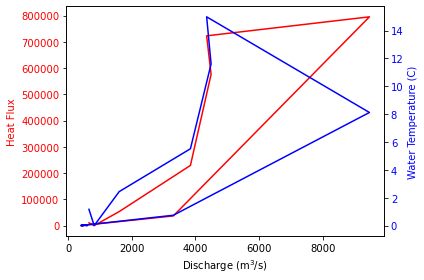

In [148]:
fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('Discharge (m$^3$/s)')
ax1.set_ylabel('Heat Flux', color=color)
ax1.plot(result_grouped.discharge.agg("mean"), result_grouped.HF.agg("mean"), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Water Temperature (C)', color=color)  # we already handled the x-label with ax1
ax2.plot(result_grouped.discharge.agg("mean"), result_grouped.Temp.agg("mean"), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

This looks like the same pattern in Yang et al 2021 fig 8 but for the Kolyma! 